In [1]:
# 1) "Sequential" models let us define a stack of neural network layers
from keras.models import Sequential
from  keras.wrappers.scikit_learn  import  KerasClassifier
from  sklearn.model_selection  import  GridSearchCV
# import the core layers:
from keras.layers import Dense, Dropout, Activation, Flatten

import numpy as np

# Importing libraries and packages:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt
import cv2
# numpy and pandas libraries
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
# 1) "Sequential" models let us define a stack of neural network layers
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from  keras.wrappers.scikit_learn  import  KerasClassifier
from  sklearn.model_selection  import  GridSearchCV
# import the core layers:
from keras.layers import Dense, Dropout, Activation, Flatten

# our classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# for splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# for getting accuracy of our classifiers
from sklearn.metrics import accuracy_score
from keras.utils import np_utils

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import matplotlib.patches as patches

In [2]:
# import some utilities to transform/preprocess our data:

from keras.utils import np_utils

(400,)
(400, 64, 64)


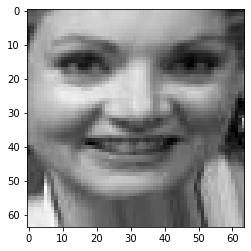

In [3]:
#a)

train_labels=pd.read_csv(r'C:\Users\Steven\OneDrive - Cal State LA\Miscellaneous\Junk\Junk\Desktop\Face\label.csv') 

y = train_labels['Label']
print(y.shape)
i=0
img=[]
while i<400:
    img.append(mpimg.imread(f'C:\\Users\\Steven\\OneDrive - Cal State LA\\Miscellaneous\\Junk\\Junk\\Desktop\\Face\\{i}.jpg'))
    i=i+1
img=np.array(img)
print(np.array(img).shape)
plt.imshow(img[2], cmap=plt.cm.gray)

In [4]:
#b
X=img.reshape(img.shape[0], 4096)
print(img.shape)

(400, 64, 64)


In [5]:

#c
X=preprocessing.scale(X)
X
print(X.shape)
print(X)

(400, 4096)
[[ 1.37649641  1.11885303  0.79610373 ... -1.17094622 -1.24726506
  -1.21711982]
 [ 1.68113398  1.3654141   1.03570156 ...  0.68710075  1.48558299
   1.58234648]
 [-0.31593455 -0.59063704 -0.75329558 ...  1.84210291  1.84204144
   1.13304942]
 ...
 [ 0.98723729  1.02022861  1.01972837 ... -0.58507555 -0.48342554
  -0.38764832]
 [ 0.68259971  0.52710647  0.34885444 ...  0.88797069  0.63687242
   0.71831368]
 [-0.231313   -0.67282406 -1.0088666  ... -0.06616154 -0.55132239
  -0.50861291]]


In [6]:
print(img[0,:])

[[186 183 179 ...  25  63  71]
 [183 183 181 ...  31  34  68]
 [179 184 185 ...  48   9  59]
 ...
 [ 32  27  23 ...   3   3   4]
 [ 26  28  24 ...   5   2   4]
 [ 18  29  33 ...   9   3   5]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)
print(X_train)
print(y_train)

[[ 0.75029695  0.60929349  0.39677401 ...  1.33992806  0.9084598
   1.4959432 ]
 [ 0.03947595 -0.04820269  0.01341748 ...  0.73731823  0.9084598
   1.20217205]
 [-0.7559666  -0.8043233  -1.1526253  ...  0.51970913  0.77266611
   1.13304942]
 ...
 [ 0.07332457  0.49423166  0.84402329 ... -0.6520322  -0.5682966
  -0.54317422]
 [-0.31593455 -0.14682712 -0.1622876  ... -1.28812035 -1.24726506
  -1.21711982]
 [ 0.71644833  0.46135685  0.28496169 ... -0.25029232 -0.19486395
  -0.16299979]]
82      5
367    33
179    39
27      1
89     32
       ..
255    20
72      6
396    19
235    16
37     17
Name: Label, Length: 300, dtype: int64


In [8]:
from  sklearn.decomposition  import  PCA

k = 50  #  k  is the number of components (new features) after dimensionality reduction

my_pca = PCA(n_components = k)

# X_Train is feature matrix of training set before dimensionality reduction, 

# X_Train_New is feature matrix of training set after dimensionality reduction:

X_train_new = my_pca. fit_transform(X_train)

X_test_new = my_pca. transform(X_test)







In [10]:
from sklearn import svm


clf=svm.SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)

#Train the model using the training sets
clf.fit(X_train_new, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_new)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.83


In [11]:
confusion_matrix(y_test, y_pred)

array([[4, 0, 0, ..., 1, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1]], dtype=int64)

In [15]:
#g)

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000,5e3,1e4,5e4,1e5],
              'kernel': ['rbf']}

X_normalized_pca = my_pca.fit_transform(X)

grid = GridSearchCV(svm.SVC(), param_grid, cv=10)
 
# fitting the model for grid search
grid.fit(X_normalized_pca, y)





print(grid.best_estimator_)

SVC(C=10)
